# **Importing Libraries (PIMA Dataset) - SPARK**

In [ ]:
import os
import sys

In [ ]:
!pip install sparktorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=0cc58e71e113c6feb1b6f8f847619726f2f199edff72fa1559e932690e3ee38c
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz
!tar xf spark-3.4.0-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
!java -version

openjdk version "11.0.19" 2023-04-18
OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

In [ ]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_362"
OpenJDK Runtime Environment (build 1.8.0_362-8u372-ga~us1-0ubuntu1~20.04-b09)
OpenJDK 64-Bit Server VM (build 25.362-b09, mixed mode)


In [ ]:
!java -version

openjdk version "1.8.0_362"
OpenJDK Runtime Environment (build 1.8.0_362-8u372-ga~us1-0ubuntu1~20.04-b09)
OpenJDK 64-Bit Server VM (build 25.362-b09, mixed mode)


In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

In [ ]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from pyspark.sql import SparkSession
from pyspark.ml import feature
from pyspark.ml import regression
from pyspark.sql import functions as fn
from pyspark.sql.functions import countDistinct
from pyspark.sql import Row
from pyspark import sql
import seaborn as sns
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml import clustering
from pyspark.ml import classification
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import seaborn as sns
import decimal
from pyspark.sql.types import StructType
from pyspark.sql.types import *
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import roc_curve, auc
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.util import MLUtils
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dataset = spark.read.csv("/content/diabetes.csv",header=True)

In [ ]:
dataset.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|  31|                   0.248| 26|      1|


# **Spark Torch**

In [ ]:
from sparktorch import serialize_torch_obj, SparkTorch
import torch
import torch.nn as nn
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.ml.pipeline import Pipeline

In [ ]:
from pyspark.sql.functions import col, udf, column
for col_name in dataset.columns:
    dataset = dataset.withColumn(col_name, col(col_name).cast('Double'))

In [ ]:
network = nn.Sequential(
    nn.Linear(8, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 2),
    nn.Softmax(dim=1)
)

In [ ]:
torch_obj = serialize_torch_obj(
    model=network,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    lr=0.0001
)

In [ ]:
inputCols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
vectorAssembler = VectorAssembler(inputCols=inputCols, outputCol='features')
dataset_vector = vectorAssembler.transform(dataset)
dataset_vector.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction| Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+
|        6.0|  148.0|         72.0|         35.0|    0.0|33.6|                   0.627|50.0|    1.0|[6.0,148.0,72.0,3...|
|        1.0|   85.0|         66.0|         29.0|    0.0|26.6|                   0.351|31.0|    0.0|[1.0,85.0,66.0,29...|
|        8.0|  183.0|         64.0|          0.0|    0.0|23.3|                   0.672|32.0|    1.0|[8.0,183.0,64.0,0...|
|        1.0|   89.0|         66.0|         23.0|   94.0|28.1|                   0.167|21.0|    0.0|[1.0,89.0,66.0,23...|
|        0.0|  137.0|         40.0|         35.0|  168.0|43.1|                   2.288|33.0|    1.0|[0.0,137.0,40.0,3...|
+-----------+-------+---

In [ ]:
spark_model = SparkTorch(
    inputCol='features',
    labelCol='Outcome',
    predictionCol='predictions',
    torchObj=torch_obj,
    iters=2000,
    miniBatch=32,
    verbose=1
)

In [ ]:
p = Pipeline(stages=[vectorAssembler, spark_model]).fit(dataset)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictions = p.transform(dataset).persist()
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="predictions", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Train accuracy = %g" % accuracy)

Train accuracy = 0.667969


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="predictions", metricName="precisionByLabel")
accuracy = evaluator.evaluate(predictions)
print("Train accuracy = %g" % accuracy)

Train accuracy = 0.682563


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="predictions", metricName="recallByLabel")
accuracy = evaluator.evaluate(predictions)
print("Train accuracy = %g" % accuracy)

Train accuracy = 0.916


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="predictions", metricName="f1")
accuracy = evaluator.evaluate(predictions)
print("Train accuracy = %g" % accuracy)

Train accuracy = 0.614435


In [ ]:
pred_df = predictions.withColumn('Outcome',predictions['Outcome'].cast('double'))
#pred_df = predictions.withColumn('prediction',predictions['prediction'].cast('double'))

In [ ]:
pred_df = pred_df.select("Outcome", "predictions")

In [ ]:
predictions_pd = pred_df.toPandas()

In [ ]:
from sklearn.metrics import confusion_matrix

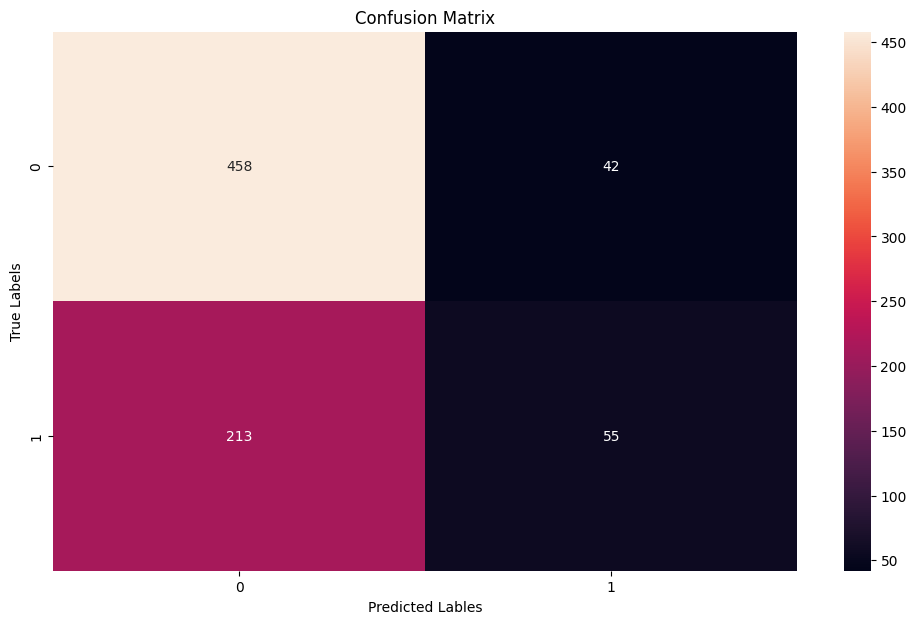

In [ ]:
plt.figure(figsize = (12,7))
ax = plt.subplot()
cf_matrix = confusion_matrix(predictions_pd['Outcome'], predictions_pd['predictions'])
sns.heatmap(cf_matrix , annot=True, fmt="g", ax = ax)
plt.xlabel("Predicted Lables")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# **Default Library**

In [ ]:
for col in dataset.columns:
    dataset = dataset.withColumn(col,dataset[col].cast('double'))

In [ ]:
inputCols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
vectorAssembler = VectorAssembler(inputCols=inputCols, outputCol='features')
dataset_vector = vectorAssembler.transform(dataset)
dataset_vector.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction| Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+
|        6.0|  148.0|         72.0|         35.0|    0.0|33.6|                   0.627|50.0|    1.0|[6.0,148.0,72.0,3...|
|        1.0|   85.0|         66.0|         29.0|    0.0|26.6|                   0.351|31.0|    0.0|[1.0,85.0,66.0,29...|
|        8.0|  183.0|         64.0|          0.0|    0.0|23.3|                   0.672|32.0|    1.0|[8.0,183.0,64.0,0...|
|        1.0|   89.0|         66.0|         23.0|   94.0|28.1|                   0.167|21.0|    0.0|[1.0,89.0,66.0,23...|
|        0.0|  137.0|         40.0|         35.0|  168.0|43.1|                   2.288|33.0|    1.0|[0.0,137.0,40.0,3...|
+-----------+-------+---

In [ ]:
dataset_vector.select("features","Outcome").show(5)

+--------------------+-------+
|            features|Outcome|
+--------------------+-------+
|[6.0,148.0,72.0,3...|    1.0|
|[1.0,85.0,66.0,29...|    0.0|
|[8.0,183.0,64.0,0...|    1.0|
|[1.0,89.0,66.0,23...|    0.0|
|[0.0,137.0,40.0,3...|    1.0|
+--------------------+-------+
only showing top 5 rows



In [ ]:
train, test = dataset_vector.randomSplit([0.8, 0.2], seed=0)

In [ ]:
print(train.count())
print(test.count())

613
155


In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
layers = [8,5,5,2]

In [ ]:
classifier = MultilayerPerceptronClassifier(labelCol='Outcome',
                                            featuresCol='features',
                                            maxIter=500,
                                            layers=layers,
                                            seed=0)

In [ ]:
mlp_model = classifier.fit(train)

In [ ]:
pred_df = mlp_model.transform(test)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol = 'Outcome', predictionCol = 'prediction', metricName = 'accuracy')
mlpacc = evaluator.evaluate(pred_df)
mlpacc

0.6387096774193548

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol = 'Outcome', predictionCol = 'prediction', metricName = 'precisionByLabel')
mlpacc = evaluator.evaluate(pred_df)
mlpacc

0.7529411764705882

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol = 'Outcome', predictionCol = 'prediction', metricName = 'recallByLabel')
mlpacc = evaluator.evaluate(pred_df)
mlpacc

0.6464646464646465

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol = 'Outcome', predictionCol = 'prediction', metricName = 'f1')
mlpacc = evaluator.evaluate(pred_df)
mlpacc

0.6450366214742091

In [ ]:
pred_df.show(4)

+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+--------------------+--------------------+----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction| Age|Outcome|            features|       rawPrediction|         probability|prediction|
+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+--------------------+--------------------+----------+
|        0.0|   99.0|          0.0|          0.0|    0.0|25.0|                   0.253|22.0|    0.0|(8,[1,5,6,7],[99....|[-12.977404231410...|[1.48161409041004...|       1.0|
|        0.0|  100.0|         70.0|         26.0|   50.0|30.8|                   0.597|21.0|    0.0|[0.0,100.0,70.0,2...|[0.83916024781033...|[0.93604763560701...|       0.0|
|        0.0|  102.0|         64.0|         46.0|   78.0|40.6|                   0.496|21.0|    0.0|[0.0,102.0,64.0,4...|[-12

In [ ]:
pred_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'features',
 'rawPrediction',
 'probability',
 'prediction']

In [ ]:
pred_df = pred_df.withColumn('Outcome',pred_df['Outcome'].cast('double'))
pred_df = pred_df.withColumn('prediction',pred_df['prediction'].cast('double'))

In [ ]:
pred_df = pred_df.select("Outcome", "prediction")

In [ ]:
predictions_pd = pred_df.toPandas()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
classes = ['No Diabetes', 'Diabetes']
clr = classification_report(predictions_pd['Outcome'], predictions_pd['prediction'], target_names=classes)
print("Classification Report:\n-----------------------------\n", clr)

Classification Report:
-----------------------------
               precision    recall  f1-score   support

 No Diabetes       0.75      0.65      0.70        99
    Diabetes       0.50      0.62      0.56        56

    accuracy                           0.64       155
   macro avg       0.63      0.64      0.63       155
weighted avg       0.66      0.64      0.65       155



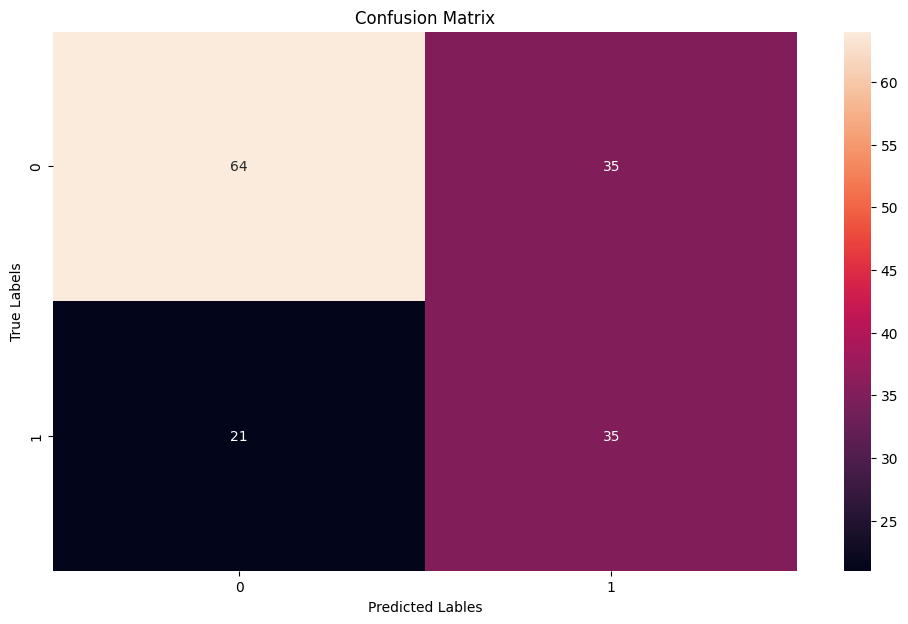

In [ ]:
plt.figure(figsize = (12,7))
ax = plt.subplot()
cf_matrix = confusion_matrix(predictions_pd['Outcome'], predictions_pd['prediction'])
sns.heatmap(cf_matrix , annot=True, fmt="g", ax = ax)
plt.title('Pyspark Environment')
plt.xlabel("Predicted Lables")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()